## Data Scraping and data cleaning for WORLD WIDE Data

In [547]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [548]:
url="https://www.worldometers.info/coronavirus/"

In [549]:
response=requests.get(url)
print (response)

<Response [200]>


Parsing HTML of the whole page

In [550]:
soup=BeautifulSoup(response.content, "html.parser")

Finding Title of the page

In [551]:
Title = soup.title
print(Title)

<title>Coronavirus Update (Live): 10,994,298 Cases and 524,229 Deaths from COVID-19 Virus Pandemic - Worldometer</title>


Inspecting and displaying Active cases

In [552]:
divsActiveCases=soup.find("div", class_="panel_flip")
for i in divsActiveCases.find_all("div", class_="panel_front"):
    print(i.text)


4,316,570
Currently Infected Patients


4,258,699 (99%)
in Mild Condition

57,871 (1%)
Serious or Critical


Show Graph



To find out table details

In [553]:
coronatable=soup.find_all("table")

In [554]:
len(coronatable)

3

In [555]:
co=coronatable[0]

Parse first row as Header

In [556]:
country=[] 
total_cases=[]
new_cases=[]
total_death=[]
new_death=[]
total_recovered=[]
active_cases=[]
serious_critical=[]
totCases_1Mpop=[]
deaths_1Mpop=[]
total_tests=[]
tests_1Mpop=[]
population=[]
rows=co.find_all("tr")[9:-8]
for row in rows:
    col=row.find_all("td")
     
    country.append(col[1].text.strip())
    total_cases.append(col[2].text.strip())
    new_cases.append(col[3].text.strip())
    total_death.append(col[4].text.strip())
    new_death.append(col[5].text.strip())
    total_recovered.append(col[6].text.strip())
    active_cases.append(col[7].text.strip())
    serious_critical.append(col[8].text.strip())
    totCases_1Mpop.append(col[9].text.strip())
    deaths_1Mpop.append(col[10].text.strip())
    total_tests.append(col[11].text.strip())
    tests_1Mpop.append(col[12].text.strip())
    population.append(col[13].text.strip())
print(country,
total_cases,
new_cases, 
total_death,
new_death,
total_recovered,
active_cases,
serious_critical,
totCases_1Mpop,
deaths_1Mpop,
total_tests,
tests_1Mpop,
population)

['USA', 'Brazil', 'Russia', 'India', 'Spain', 'Peru', 'Chile', 'UK', 'Italy', 'Mexico', 'Iran', 'Pakistan', 'Turkey', 'Saudi Arabia', 'Germany', 'South Africa', 'France', 'Bangladesh', 'Colombia', 'Canada', 'Qatar', 'Egypt', 'Sweden', 'Argentina', 'Belarus', 'Belgium', 'Ecuador', 'Indonesia', 'Iraq', 'Netherlands', 'UAE', 'Kuwait', 'Ukraine', 'Singapore', 'Kazakhstan', 'Portugal', 'Oman', 'Philippines', 'Bolivia', 'Panama', 'Poland', 'Dominican Republic', 'Afghanistan', 'Switzerland', 'Bahrain', 'Romania', 'Israel', 'Armenia', 'Nigeria', 'Ireland', 'Honduras', 'Guatemala', 'Japan', 'Azerbaijan', 'Ghana', 'Austria', 'Moldova', 'Serbia', 'Algeria', 'Nepal', 'Morocco', 'S. Korea', 'Denmark', 'Cameroon', 'Czechia', 'Ivory Coast', 'Sudan', 'Uzbekistan', 'Norway', 'Malaysia', 'Australia', 'Finland', 'DRC', 'Senegal', 'El Salvador', 'Kenya', 'Kyrgyzstan', 'North Macedonia', 'Venezuela', 'Haiti', 'Tajikistan', 'Ethiopia', 'Gabon', 'Guinea', 'Bulgaria', 'Bosnia and Herzegovina', 'Djibouti', 'Ma

Create a Dataframe

In [557]:
df = pd.DataFrame(list(zip(country,
total_cases,
new_cases, 
total_death,
new_death,
total_recovered,
active_cases,
serious_critical,
totCases_1Mpop,
deaths_1Mpop,
total_tests,
tests_1Mpop,
population)), columns=["Country","Total Cases","New Cases","Total Deaths","New Deaths","Total Recovered","Active Cases",
                       "Serious,Critical","Total Cases/1Mpop","Deaths/1Mpop","Total Tests","Tests/1Mpop","Population"])
df

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,"Serious,Critical",Total Cases/1Mpop,Deaths/1Mpop,Total Tests,Tests/1Mpop,Population
0,USA,"2,837,189",,"131,485",,"1,191,091",,"1,514,613","15,907","8,571",397,"35,538,123","107,362"
1,Brazil,"1,501,353",,"61,990",,"916,147",,"523,216","8,318","7,063",292,"3,290,316","15,479"
2,Russia,"661,165",,"9,683",,"428,978",,"222,504","2,300","4,531",66,"20,451,110","140,139"
3,India,"627,168",,"18,225",,"379,902",,"229,041","8,944",454,13,"9,297,749","6,737"
4,Spain,"297,183",,"28,368",,N/A,N/A,N/A,617,"6,356",607,"5,448,984","116,544"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Caribbean Netherlands,7,,,,7,,0,,267,,424,"16,168"
211,St. Barth,6,,,,6,,0,,607,,152,"15,389"
212,Anguilla,3,,,,3,,0,,200,,272,"18,130"
213,Saint Pierre Miquelon,1,,,,1,,0,,173,,,


Dropping below columns as it serves no purpose in analysis
Serious,Critical,
Total Cases/1Mpop,
Deaths/1Mpop,
Tests/1Mpop

Also Dropping New Cases and New Deaths as there are lots of missing values

In [558]:
df.drop(["Serious,Critical","Total Cases/1Mpop","Deaths/1Mpop","Tests/1Mpop","New Cases", "New Deaths"],axis=1, inplace = True) 
df

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
0,USA,"2,837,189","131,485","1,191,091",,397,"107,362"
1,Brazil,"1,501,353","61,990","916,147",,292,"15,479"
2,Russia,"661,165","9,683","428,978",,66,"140,139"
3,India,"627,168","18,225","379,902",,13,"6,737"
4,Spain,"297,183","28,368",N/A,N/A,607,"116,544"
...,...,...,...,...,...,...,...
210,Caribbean Netherlands,7,,7,,,"16,168"
211,St. Barth,6,,6,,,"15,389"
212,Anguilla,3,,3,,,"18,130"
213,Saint Pierre Miquelon,1,,1,,,


Replacing unexpected missing values that is N/A in the dataframe

In [559]:
df.loc[df['Total Recovered'] == 'N/A', 'Total Recovered'] = 0
df.loc[df['Active Cases'] == 'N/A', 'Active Cases'] = 0

df

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
0,USA,"2,837,189","131,485","1,191,091",,397,"107,362"
1,Brazil,"1,501,353","61,990","916,147",,292,"15,479"
2,Russia,"661,165","9,683","428,978",,66,"140,139"
3,India,"627,168","18,225","379,902",,13,"6,737"
4,Spain,"297,183","28,368",0,0,607,"116,544"
...,...,...,...,...,...,...,...
210,Caribbean Netherlands,7,,7,,,"16,168"
211,St. Barth,6,,6,,,"15,389"
212,Anguilla,3,,3,,,"18,130"
213,Saint Pierre Miquelon,1,,1,,,


In [560]:
df.dtypes

Country            object
Total Cases        object
Total Deaths       object
Total Recovered    object
Active Cases       object
Total Tests        object
Population         object
dtype: object

In [561]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          215 non-null    object
 1   Total Cases      215 non-null    object
 2   Total Deaths     215 non-null    object
 3   Total Recovered  215 non-null    object
 4   Active Cases     215 non-null    object
 5   Total Tests      215 non-null    object
 6   Population       215 non-null    object
dtypes: object(7)
memory usage: 11.9+ KB


In [562]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df.replace(np.nan,0, inplace=True)

df

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
0,USA,"2,837,189","131,485","1,191,091",0,397,"107,362"
1,Brazil,"1,501,353","61,990","916,147",0,292,"15,479"
2,Russia,"661,165","9,683","428,978",0,66,"140,139"
3,India,"627,168","18,225","379,902",0,13,"6,737"
4,Spain,"297,183","28,368",0,0,607,"116,544"
...,...,...,...,...,...,...,...
210,Caribbean Netherlands,7,0,7,0,0,"16,168"
211,St. Barth,6,0,6,0,0,"15,389"
212,Anguilla,3,0,3,0,0,"18,130"
213,Saint Pierre Miquelon,1,0,1,0,0,0


Cleaning data for columns Total Cases

In [563]:
total_cases1=[]
for i in df["Total Cases"]:
    s=str(i)
    s1=s.replace(",","")
    s2=int(s1)
    total_cases1.append(s2)

print(total_cases1)


[2837189, 1501353, 661165, 627168, 297183, 292004, 284541, 283757, 240961, 238511, 232863, 221896, 202284, 197608, 196717, 168061, 166378, 153277, 106110, 104772, 97897, 71299, 70639, 69941, 62698, 61727, 59468, 59394, 53708, 50335, 49469, 47859, 46763, 44479, 44075, 42782, 42555, 38805, 35528, 35237, 35146, 34197, 32022, 31967, 27837, 27746, 27542, 27320, 27110, 25489, 21120, 20072, 18874, 18684, 18134, 17941, 17150, 15195, 14657, 14519, 12969, 12967, 12815, 12592, 12178, 9992, 9663, 9199, 8902, 8643, 8066, 7241, 7189, 7054, 7000, 6941, 6767, 6625, 6273, 6101, 6058, 5846, 5513, 5450, 5315, 4788, 4715, 4606, 4444, 4395, 4166, 4023, 3788, 3458, 3180, 3080, 3071, 2944, 2912, 2662, 2650, 2519, 2403, 2400, 2353, 2303, 2260, 2066, 2021, 1990, 1850, 1825, 1796, 1700, 1654, 1634, 1632, 1530, 1518, 1382, 1342, 1301, 1243, 1221, 1199, 1178, 1136, 1122, 1081, 1063, 999, 967, 947, 943, 918, 902, 891, 873, 868, 855, 819, 717, 715, 712, 698, 671, 667, 617, 616, 571, 547, 531, 509, 449, 355, 341, 33

Cleaning data from Total Deaths

In [564]:
total_death1=[]
for i in df["Total Deaths"]:
    s=str(i)
    s1=s.replace(",","")
    s2=int(s1)
    total_death1.append(s2)

print(total_death1)


[131485, 61990, 9683, 18225, 28368, 10045, 5920, 43995, 34818, 29189, 11106, 4551, 5167, 1752, 9064, 2844, 29875, 1926, 3641, 8642, 118, 3120, 5411, 1385, 405, 9765, 4639, 2987, 2160, 6113, 317, 359, 1212, 26, 188, 1587, 188, 1274, 1271, 667, 1492, 765, 807, 1965, 94, 1687, 325, 469, 616, 1738, 591, 843, 975, 228, 117, 705, 560, 287, 928, 31, 229, 282, 606, 313, 353, 68, 604, 27, 251, 121, 104, 328, 176, 121, 200, 152, 76, 321, 57, 110, 52, 103, 42, 33, 232, 189, 55, 129, 16, 110, 587, 18, 47, 192, 58, 9, 51, 90, 110, 69, 35, 83, 24, 10, 86, 19, 117, 11, 38, 69, 10, 78, 35, 28, 24, 111, 30, 22, 60, 41, 16, 15, 7, 325, 21, 50, 9, 30, 68, 3, 19, 53, 28, 15, 6, 0, 26, 11, 74, 52, 37, 13, 10, 13, 42, 9, 14, 7, 12, 47, 13, 2, 21, 7, 0, 10, 24, 17, 9, 6, 7, 0, 14, 14, 1, 0, 0, 1, 0, 14, 0, 1, 9, 3, 0, 8, 4, 11, 3, 7, 1, 0, 15, 0, 3, 0, 2, 0, 2, 3, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 4634]


Cleaning data for Total Recovered and active cases

In [565]:
total_recovered1=[]
for i in df["Total Recovered"]:
    s=str(i)
    s1=s.replace("+","")
    s2=s1.replace(",","")
    s3=int(s2)
    total_recovered1.append(s3)

print(total_recovered1)

active_cases1=[]
for i in df["Active Cases"]:
    s=str(i)
    s1=s.replace("+","")
    s2=s1.replace(",","")
    s3=int(s2)
    active_cases1.append(s3)
print(active_cases1)


[1191091, 916147, 428978, 379902, 0, 182097, 249247, 0, 191083, 142593, 194098, 113623, 176965, 137669, 181000, 81999, 76802, 66442, 44531, 68347, 86597, 19288, 0, 24186, 48738, 17073, 28032, 26667, 27912, 0, 38664, 38390, 20558, 39429, 26251, 28097, 25318, 10673, 10358, 16445, 22209, 18141, 16041, 29200, 22583, 20433, 17599, 15484, 10801, 23364, 2190, 3279, 16772, 10425, 13550, 16514, 9846, 12912, 10342, 5320, 9090, 11759, 11769, 10100, 7822, 4660, 4624, 6034, 8138, 8437, 7132, 6700, 2317, 4599, 4137, 2109, 2655, 2748, 2100, 1141, 4690, 2430, 2508, 4392, 2802, 2515, 4564, 1727, 1680, 4012, 2721, 1589, 810, 1374, 3066, 460, 842, 951, 2155, 1559, 2341, 1238, 1040, 1969, 2221, 1108, 1502, 1863, 333, 1842, 1828, 1536, 1242, 1466, 317, 1384, 1348, 1490, 1007, 486, 271, 629, 1120, 513, 333, 1039, 889, 997, 959, 493, 833, 846, 828, 821, 249, 847, 224, 452, 785, 800, 338, 260, 560, 651, 656, 649, 424, 173, 315, 512, 252, 472, 183, 438, 340, 330, 312, 97, 113, 223, 200, 24, 117, 98, 28, 179, 5

Cleaning data for total_tests and population
In Total Tests few of the values were unexpected missing data s float while all the other values are int, so we have converted all the float values to integer

In [566]:
total_tests1=[]
for i in df["Total Tests"]:
    s=str(i)
    s1=s.replace("+","")
    s2=s1.replace(",","")
    s3=float(s2)
    s4=int(s3)
    total_tests1.append(s4)
print(total_tests1)

population1=[]
for i in df["Population"]:
    s=str(i)
    s1=s.replace("+","")
    s2=s1.replace(",","")
    s3=int(s2)
    population1.append(s3)
print(population1)

[397, 292, 66, 13, 607, 305, 310, 648, 576, 226, 132, 21, 61, 50, 108, 48, 458, 12, 72, 229, 42, 30, 536, 31, 43, 843, 263, 11, 54, 357, 32, 84, 28, 4, 10, 156, 37, 12, 109, 155, 39, 71, 21, 227, 55, 88, 35, 158, 3, 352, 60, 47, 8, 22, 4, 78, 139, 33, 21, 1, 6, 6, 105, 12, 33, 3, 14, 0, 46, 4, 4, 59, 2, 7, 31, 3, 12, 154, 2, 10, 5, 0, 19, 3, 33, 58, 56, 28, 54, 176, 61, 4, 10, 18, 0, 2, 36, 6, 27, 24, 128, 13, 0, 19, 8, 3, 6, 0, 3, 52, 29, 29, 5, 5, 12, 53, 2, 4, 8, 7, 0, 27, 0, 11, 2, 4, 0, 16, 3, 0, 16, 3, 8, 4, 0, 0, 4, 9, 5, 673, 7, 59, 3, 0, 1238, 20, 2, 0, 19, 270, 22, 2, 0, 0, 0, 8, 282, 0, 0, 0, 8, 0, 18, 37, 0, 0, 0, 15, 0, 35, 0, 0, 145, 7, 0, 6, 102, 28, 28, 24, 26, 0, 350, 0, 31, 0, 0, 0, 52, 78, 0, 0, 5, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 0, 2, 0, 33, 0, 0, 0, 0, 3]
[107362, 15479, 140139, 6737, 116544, 52173, 59163, 146044, 90946, 4735, 20471, 6115, 41304, 49627, 70102, 28766, 21212, 4892, 15685, 75463, 130385, 1319, 51399, 8233, 108828, 109636, 8852, 3104, 14115, 3

Final Data Frame will look like as below

In [613]:
df=pd.DataFrame(list(zip(country, total_cases1,
 total_death1,
total_recovered1,
active_cases1,
total_tests1,
population1)), 
                columns=["Country","Total Cases","Total Deaths","Total Recovered","Active Cases",
                       "Total Tests","Population"])
df

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
0,USA,2837189,131485,1191091,0,397,107362
1,Brazil,1501353,61990,916147,0,292,15479
2,Russia,661165,9683,428978,0,66,140139
3,India,627168,18225,379902,0,13,6737
4,Spain,297183,28368,0,0,607,116544
...,...,...,...,...,...,...,...
210,Caribbean Netherlands,7,0,7,0,0,16168
211,St. Barth,6,0,6,0,0,15389
212,Anguilla,3,0,3,0,0,18130
213,Saint Pierre Miquelon,1,0,1,0,0,0


In [614]:
df.dtypes

Country            object
Total Cases         int64
Total Deaths        int64
Total Recovered     int64
Active Cases        int64
Total Tests         int64
Population          int64
dtype: object

## Data visualization and Data Analysis

In [615]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Total Cases,215.0,51136.269767,231111.432098,1.0,303.5,2260.0,18779.0,2837189.0
Total Deaths,215.0,2438.274419,11175.309832,0.0,7.0,42.0,340.5,131485.0
Total Recovered,215.0,27663.488372,113665.091207,0.0,147.5,1120.0,10350.0,1191091.0
Active Cases,215.0,79.800000,678.762144,0.0,0.0,0.0,0.0,8929.0
Total Tests,215.0,67.000000,152.046414,0.0,2.0,12.0,52.0,1238.0
Population,215.0,44329.000000,75505.424343,0.0,3257.0,15800.0,48238.5,412812.0


In [616]:
df.corr()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
Total Cases,1.000000,0.932105,0.967986,0.070317,0.268934,0.064900
Total Deaths,0.932105,1.000000,0.862118,0.081397,0.412250,0.073411
Total Recovered,0.967986,0.862118,1.000000,0.080145,0.231098,0.058971
Active Cases,0.070317,0.081397,0.080145,1.000000,0.012906,-0.047492
Total Tests,0.268934,0.412250,0.231098,0.012906,1.000000,0.213544
Population,0.064900,0.073411,0.058971,-0.047492,0.213544,1.000000


## Creating function and visualizing data for CovidImpact on countries - World Vizualization1

Here we have Created the function for Toal Cases, Total Deaths, Total Recovered and Country mapping.
We have also Sorted the values on the basic of Maximum 'Total cases' in the coutry.
Country with the maximum 'Total cases' is followed by the county with less number of 'Total cases'.
For better vizualization we will be considering first 10 countries 

In [617]:
def CovidImpact():
    MostAffected10Countries = df.sort_values(by=['Total Cases'],ascending=False)
    data = MostAffected10Countries.iloc[:10,:4]   
    dfCovidImpact = pd.DataFrame(data)
    
    return dfCovidImpact
dfCovidImpact = CovidImpact ()
dfCovidImpact

,Country,Total Cases,Total Deaths,Total Recovered
0,USA,2837189,131485,1191091
1,Brazil,1501353,61990,916147
2,Russia,661165,9683,428978
3,India,627168,18225,379902
4,Spain,297183,28368,0
5,Peru,292004,10045,182097
6,Chile,284541,5920,249247
7,UK,283757,43995,0
8,Italy,240961,34818,191083
9,Mexico,238511,29189,142593


To vizualize above data plotting a line graph for top 10 affected countries

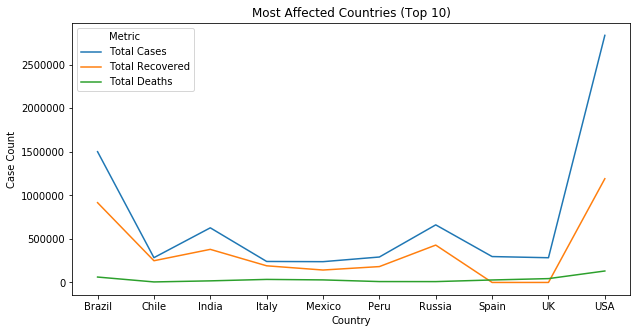

In [618]:
plot_data1 = pd.melt(dfCovidImpact, id_vars = ['Country'],  value_vars=['Total Cases', 'Total Recovered', 'Total Deaths'], 
                var_name='Metric', value_name='Case Count') 
plt.figure(figsize=(10, 5))
sns.lineplot(x="Country",hue="Metric", y="Case Count", data=plot_data1)
plt.title('Most Affected Countries (Top 10)')
plt.show()



Graph shows that the death rate is very minimal over total cases in each country
Also, the recovery rate is more than the death rate
Chile and Italy have highest recovery rate over total cases as compare to other countries

### Vizualizing data for Test conductucted over the total population - World Data Vizualization 2

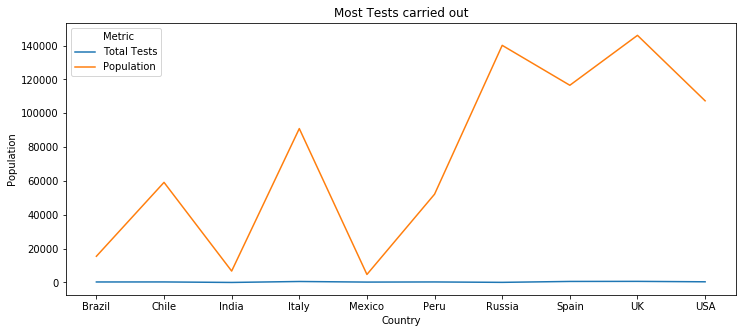

In [619]:
plot_data2 = pd.melt(df.iloc[:10], id_vars = ['Country'],  value_vars=['Total Tests', 'Population'], 
                var_name='Metric', value_name='Population')
plt.figure(figsize=(12, 5))
sns.lineplot(x="Country", hue="Metric", y="Population", data=plot_data2)
plt.title('Most Tests carried out')
plt.show()

Tests carried out are very minimal compare to the population of each country.
Most of the tests are conducted in Mexico and India over the number of population compare to other countries.
Tests Conducted in UK are very minimal over the population of teh country so the actual impact of COVID19 cannot be find out

## Scrapping of India Data

In [449]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [335]:
url="https://www.mohfw.gov.in/"

In [336]:
response=requests.get(url)
print (response)

<Response [200]>


In [337]:
soup=BeautifulSoup(response.content, "html.parser")

In [338]:
Title = soup.title
print(Title)

<title>MoHFW | Home</title>


Displays Covid status for today

In [339]:
StatusCovidOn = soup.find("div",class_="status-update")
print(StatusCovidOn.text)


COVID-19 INDIA as on : 02	July 2020, 08:00 IST (GMT+5:30)



All Active, cured, Migrated Covid cases India

In [340]:
divs=soup.find("div", class_="site-stats-count")
print (divs.text)





226947
Active Cases



359859
Cured / Discharged 
Cured/ 
Discharged 



17834
Deaths  



1
Migrated








COVID-19 INDIA as on : 02	July 2020, 08:00 IST (GMT+5:30)




Finding out total tables present on the page

In [341]:
coronatableInd=soup.find_all("table")
len(coronatableInd)

1

Storing table details, as we have only one table and we will be looking into that table having COVID state wise details

In [342]:
co=coronatableInd[0]

In [343]:
state=[]
active_cases=[]
curedDischargedMigrated_cases=[]
deaths=[]
total_confirmed_cases=[]

rows=co.find_all("tr")[1:-6]

for row in rows:
    col=row.find_all("td")
    
    state.append(col[1].text.strip())
    active_cases.append(col[2].text.strip())
    curedDischargedMigrated_cases.append(col[3].text.strip())
    deaths.append(col[4].text.strip())
    total_confirmed_cases.append(col[5].text.strip())
    
print(state,
active_cases,
curedDischargedMigrated_cases, 
deaths,
total_confirmed_cases)

['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttarakhand', 'Uttar Pradesh', 'West Bengal'] ['50', '8071', '128', '2719', '2233', '73', '623', '129', '27007', '713', '7335', '4202', '355', '2734', '575', '8198', '2130', '295', '2625', '79091', '681', '9', '37', '291', '1938', '430', '1652', '3317', '48', '39859', '9008', '302', '589', '6709', '5959'] ['50', '6988', '66', '5851', '7946', '367', '2303', '86', '59992', '670', '24030', '10499', '614', '4856', '1931', '8063', '2439', '694', '10655', '93154', '579', '42', '123', '168', '5353', '272', '3867', '14574', '53', '52926',

Create dataframe for the statewise data

In [395]:
df=pd.DataFrame(list(zip(state,
                         total_confirmed_cases,
                         curedDischargedMigrated_cases, 
                         deaths,
                         active_cases,
)), columns=["State","Total Confirmed Cases","Cured Discharged Migrated Cases","Deaths","Active Cases"])
df

,State,Total Confirmed Cases,Cured Discharged Migrated Cases,Deaths,Active Cases
0,Andaman and Nicobar Islands,100,50,0,50
1,Andhra Pradesh,15252,6988,193,8071
2,Arunachal Pradesh,195,66,1,128
3,Assam,8582,5851,12,2719
4,Bihar,10249,7946,70,2233
5,Chandigarh,446,367,6,73
6,Chhattisgarh,2940,2303,14,623
7,Dadra and Nagar Haveli and Daman and Diu,215,86,0,129
8,Delhi,89802,59992,2803,27007
9,Goa,1387,670,4,713


Checking if there are any missing values in above data set.

In [396]:
df.isnull().sum()

State                              0
Total Confirmed Cases              0
Cured Discharged Migrated Cases    0
Deaths                             0
Active Cases                       0
dtype: int64

We do NOT find any missing values in above dataset

In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   State                            35 non-null     object
 1   Total Confirmed Cases            35 non-null     object
 2   Cured Discharged Migrated Cases  35 non-null     object
 3   Deaths                           35 non-null     object
 4   Active Cases                     35 non-null     object
dtypes: object(5)
memory usage: 1.5+ KB


Changing the datatype from Object to Integer for better data analysis

In [398]:
df["Active Cases"] = df["Active Cases"].astype(str).astype(int)
df["Cured Discharged Migrated Cases"] = df["Cured Discharged Migrated Cases"].astype(str).astype(int)
df["Deaths"] = df["Deaths"].astype(str).astype(int)
df["Total Confirmed Cases"] = df["Total Confirmed Cases"].astype(str).astype(int)


In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   State                            35 non-null     object
 1   Total Confirmed Cases            35 non-null     int32 
 2   Cured Discharged Migrated Cases  35 non-null     int32 
 3   Deaths                           35 non-null     int32 
 4   Active Cases                     35 non-null     int32 
dtypes: int32(4), object(1)
memory usage: 968.0+ bytes


In [400]:
df

,State,Total Confirmed Cases,Cured Discharged Migrated Cases,Deaths,Active Cases
0,Andaman and Nicobar Islands,100,50,0,50
1,Andhra Pradesh,15252,6988,193,8071
2,Arunachal Pradesh,195,66,1,128
3,Assam,8582,5851,12,2719
4,Bihar,10249,7946,70,2233
5,Chandigarh,446,367,6,73
6,Chhattisgarh,2940,2303,14,623
7,Dadra and Nagar Haveli and Daman and Diu,215,86,0,129
8,Delhi,89802,59992,2803,27007
9,Goa,1387,670,4,713


#### Finding top 10 Covid19 affected states in India

In [407]:
MostAffected10States = df.sort_values(by=['Total Confirmed Cases'],ascending=False)
MostAffected10States

,State,Total Confirmed Cases,Cured Discharged Migrated Cases,Deaths,Active Cases
19,Maharashtra,180298,93154,8053,79091
29,Tamil Nadu,94049,52926,1264,39859
8,Delhi,89802,59992,2803,27007
10,Gujarat,33232,24030,1867,7335
33,Uttar Pradesh,24056,16629,718,6709
34,West Bengal,19170,12528,683,5959
27,Rajasthan,18312,14574,421,3317
30,Telangana,17357,8082,267,9008
15,Karnataka,16514,8063,253,8198
1,Andhra Pradesh,15252,6988,193,8071


#### Created the function to find top 10 most affected COVID 19 states
It has all the information about total Cases, cured cases, Deaths and active cases

In [410]:
def CovidImpactInd():
    MostAffected10States = df.sort_values(by=['Total Confirmed Cases'],ascending=False)
    dataInd = MostAffected10States.iloc[:10,:]   
    dfCovidImpactInd = pd.DataFrame(dataInd)
    
    return dfCovidImpactInd
dfCovidImpactInd = CovidImpactInd ()
dfCovidImpactInd

,State,Total Confirmed Cases,Cured Discharged Migrated Cases,Deaths,Active Cases
19,Maharashtra,180298,93154,8053,79091
29,Tamil Nadu,94049,52926,1264,39859
8,Delhi,89802,59992,2803,27007
10,Gujarat,33232,24030,1867,7335
33,Uttar Pradesh,24056,16629,718,6709
34,West Bengal,19170,12528,683,5959
27,Rajasthan,18312,14574,421,3317
30,Telangana,17357,8082,267,9008
15,Karnataka,16514,8063,253,8198
1,Andhra Pradesh,15252,6988,193,8071


#### Vizualization of COVID19 most affected states (top 10) with the metric Total cases, Cured cases, Deaths

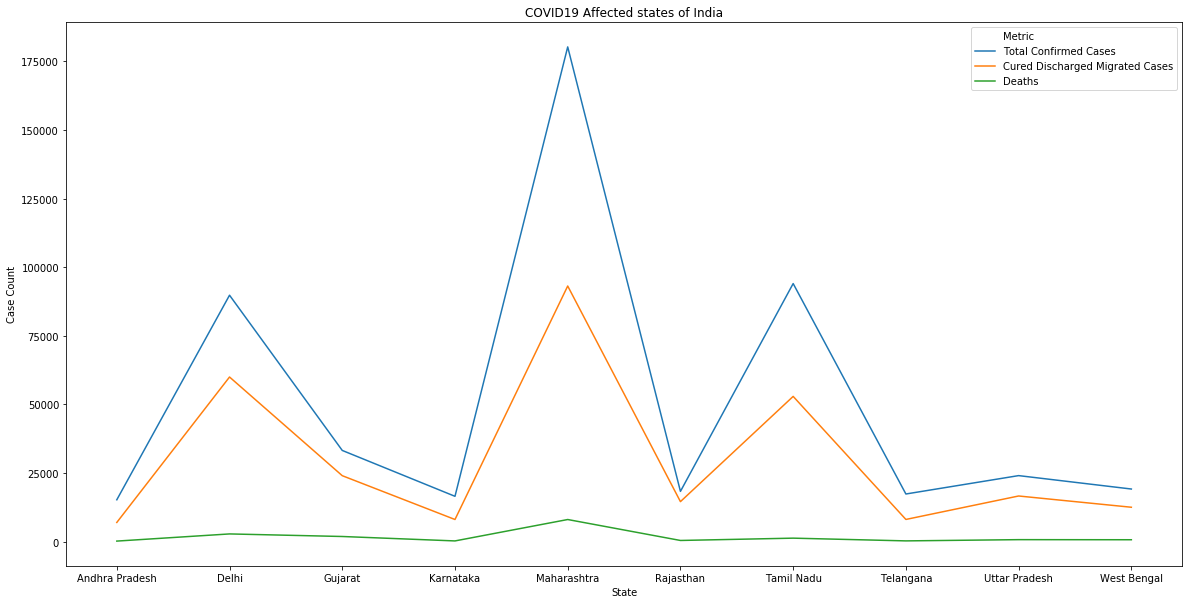

In [412]:
plot_data1 = pd.melt(dfCovidImpactInd, id_vars = ['State'],  value_vars=['Total Confirmed Cases', 'Cured Discharged Migrated Cases', 'Deaths'], 
                var_name='Metric', value_name='Case Count') 
plt.figure(figsize=(20, 10))
sns.lineplot(x="State",hue="Metric", y="Case Count", data=plot_data1)
plt.title('COVID19 Affected states of India')
plt.show()

Cases in Maharastra are highest and so the death rate.
